<a href="https://colab.research.google.com/github/Greta-gerasimov/ALG_2/blob/Lesson2_LR_SGD/SDG_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [330]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

from sklearn.linear_model import  Ridge
%matplotlib inline

In [331]:
data, target, coef = datasets.make_regression(n_samples = 1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

In [332]:
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [333]:
def mserror(X, w, y):
    y_pred = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [334]:
# Gradient Descent Function
def gradient_descent(X, Y, w):
    w_list = [w.copy()]
    errors = []
    max_iter = 15000
    L_r = 0.0001
    stopping_threshold = 1e-6 
    weight_diff=np.inf 
    iter_num = 0 
    print(f"initial weights: {w}")
  
   
    while weight_diff > stopping_threshold  and iter_num < max_iter:
  
        w_new = w - 2  * L_r  *np.dot(X.T, (np.dot(X,w)) - Y)/ Y.shape[0]
 
        weight_diff = np.linalg.norm(w_new - w, ord=2)
        w_list.append(w_new.copy())
        errors.append(mserror(X, w_new, Y))
        iter_num += 1
        w = w_new
    
        if iter_num % 10 == 0:
          print(f"Iteration {iter_num}: MSE {round(errors[-1],2)}, Weight \
              {w}")
    w_list = np.array(w_list)
    
    plt.plot(range(len(errors)), errors)
    plt.title('MSE')
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
  
    
    return w_list, errors



initial weights: [0. 0.]
Iteration 10: MSE 8158.95, Weight               [0.11949808 0.13224607]
Iteration 20: MSE 8127.31, Weight               [0.23876376 0.26423364]
Iteration 30: MSE 8095.79, Weight               [0.35779749 0.39596323]
Iteration 40: MSE 8064.39, Weight               [0.47659972 0.52743534]
Iteration 50: MSE 8033.12, Weight               [0.5951709  0.65865047]
Iteration 60: MSE 8001.97, Weight               [0.71351148 0.78960913]
Iteration 70: MSE 7970.94, Weight               [0.8316219  0.92031181]
Iteration 80: MSE 7940.03, Weight               [0.94950262 1.05075902]
Iteration 90: MSE 7909.24, Weight               [1.06715409 1.18095125]
Iteration 100: MSE 7878.57, Weight               [1.18457674 1.31088901]
Iteration 110: MSE 7848.02, Weight               [1.30177102 1.44057279]
Iteration 120: MSE 7817.59, Weight               [1.41873739 1.57000309]
Iteration 130: MSE 7787.28, Weight               [1.53547627 1.6991804 ]
Iteration 140: MSE 7757.09, Weight 

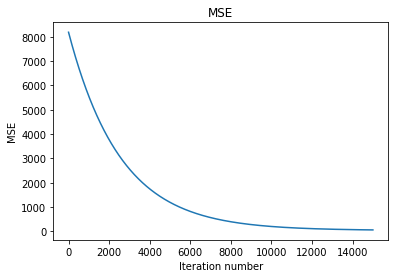

In [335]:
w = np.zeros(2)
w_list =  gradient_descent(data, target, w)

In [336]:
def SGD(X, Y, w, L_r = 1.5, max_iter = 1e4, stopping_threshold = 1e-6):
    w = np.zeros(2)
    w_list = [w.copy()]
    errors = []
    max_iter = 1e4
    
    stopping_threshold = 1e-6
    weight_diff=np.inf 
    iter_num = 0 
    np.random.seed(42)
    print(f"initial weights: {w}")

    while weight_diff > stopping_threshold  and iter_num < max_iter:
      train_ind =np.random.randint(data.shape[0])
      w_new = w - 2  * L_r * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind]))/ target.shape[0]
      weight_diff = np.linalg.norm(w_new - w, ord = 2)
      w_list.append(w_new.copy())
      errors.append(mserror(data,w_new,target))
      iter_num += 1
      w = w_new
    w_list = np.array(w_list)
    
    plt.plot(range(len(errors)), errors)
    plt.title('MSE')
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    
    print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')
    
    return w_list, errors


initial weights: [0. 0.]
В случае использования стохастического градиентного спуска функционал ошибки составляет 38.6369


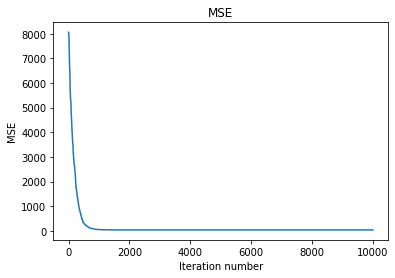

In [337]:
w = np.zeros(2)
w_list_stoch =  SGD(data, target, w, L_r = 1.5, max_iter = 1e4, stopping_threshold = 1e-6)

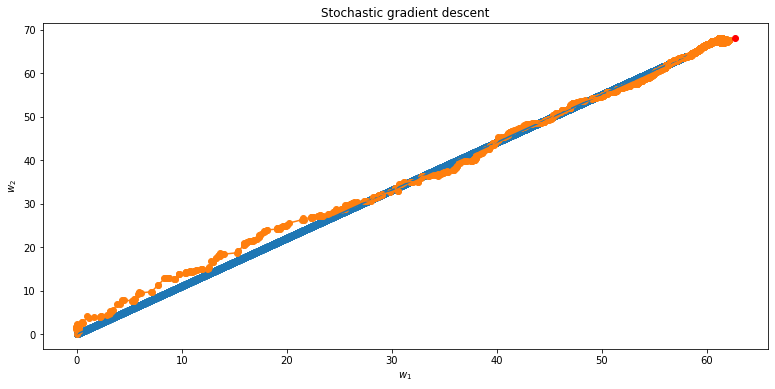

In [338]:

w_true = coef
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[0][:, 0], w_list[0][:, 1])
plt.scatter(w_list_stoch[0][:, 0], w_list_stoch[0][:, 1])
plt.scatter(w_true[0], w_true[1], c='r')
plt.plot(w_list[0][:, 0], w_list[0][:, 1], label='Gradient Descent')
plt.plot(w_list_stoch[0][:, 0], w_list_stoch[0][:, 1], label='Stochastic Gradient Descent')

plt.show()

initial weights: [-0.64831027 -0.82432301]
Iteration 10: MSE 8345.94, Weight               [-0.52755649 -0.69046105]
Iteration 20: MSE 8313.57, Weight               [-0.40703755 -0.55686075]
Iteration 30: MSE 8281.33, Weight               [-0.28675298 -0.42352159]
Iteration 40: MSE 8249.21, Weight               [-0.16670233 -0.29044308]
Iteration 50: MSE 8217.21, Weight               [-0.04688515 -0.15762469]
Iteration 60: MSE 8185.34, Weight               [ 0.07269901 -0.02506592]
Iteration 70: MSE 8153.6, Weight               [0.19205062 0.10723374]
Iteration 80: MSE 8121.98, Weight               [0.31117012 0.2392748 ]
Iteration 90: MSE 8090.48, Weight               [0.43005796 0.37105775]
Iteration 100: MSE 8059.11, Weight               [0.5487146  0.50258311]
Iteration 110: MSE 8027.85, Weight               [0.66714048 0.63385138]
Iteration 120: MSE 7996.72, Weight               [0.78533605 0.76486306]
Iteration 130: MSE 7965.71, Weight               [0.90330176 0.89561866]
Iterat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


Iteration 90: MSE 8051.86, Weight               [ 1.24640627 -0.06542904]
Iteration 100: MSE 8020.64, Weight               [1.36341063 0.06700788]
Iteration 110: MSE 7989.53, Weight               [1.48018757 0.19918581]
Iteration 120: MSE 7958.55, Weight               [1.59673755 0.33110525]
Iteration 130: MSE 7927.69, Weight               [1.713061   0.46276671]
Iteration 140: MSE 7896.94, Weight               [1.82915837 0.5941707 ]
Iteration 150: MSE 7866.32, Weight               [1.94503008 0.72531771]
Iteration 160: MSE 7835.82, Weight               [2.06067659 0.85620826]
Iteration 170: MSE 7805.43, Weight               [2.17609832 0.98684283]
Iteration 180: MSE 7775.17, Weight               [2.29129572 1.11722194]
Iteration 190: MSE 7745.02, Weight               [2.40626921 1.24734608]
Iteration 200: MSE 7714.99, Weight               [2.52101925 1.37721576]
Iteration 210: MSE 7685.07, Weight               [2.63554625 1.50683146]
Iteration 220: MSE 7655.28, Weight               [

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


Iteration 350: MSE 7342.05, Weight               [3.05423897 3.82886111]
Iteration 360: MSE 7313.59, Weight               [3.16781874 3.95360365]
Iteration 370: MSE 7285.24, Weight               [3.28117757 4.07810241]
Iteration 380: MSE 7257.0, Weight               [3.39431588 4.20235786]
Iteration 390: MSE 7228.88, Weight               [3.50723412 4.32637048]
Iteration 400: MSE 7200.86, Weight               [3.61993271 4.45014074]
Iteration 410: MSE 7172.95, Weight               [3.73241207 4.57366913]
Iteration 420: MSE 7145.15, Weight               [3.84467263 4.6969561 ]
Iteration 430: MSE 7117.46, Weight               [3.95671482 4.82000214]
Iteration 440: MSE 7089.88, Weight               [4.06853906 4.94280771]
Iteration 450: MSE 7062.4, Weight               [4.18014578 5.06537328]
Iteration 460: MSE 7035.03, Weight               [4.2915354  5.18769932]
Iteration 470: MSE 7007.77, Weight               [4.40270833 5.30978631]
Iteration 480: MSE 6980.62, Weight               [4.5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


Iteration 90: MSE 8015.71, Weight               [0.12921875 1.21664574]
Iteration 100: MSE 7984.63, Weight               [0.24851731 1.34646694]
Iteration 110: MSE 7953.67, Weight               [0.36758374 1.47603448]
Iteration 120: MSE 7922.83, Weight               [0.48641851 1.60534886]
Iteration 130: MSE 7892.11, Weight               [0.60502206 1.73441058]
Iteration 140: MSE 7861.51, Weight               [0.72339483 1.86322013]
Iteration 150: MSE 7831.02, Weight               [0.84153729 1.991778  ]
Iteration 160: MSE 7800.66, Weight               [0.95944987 2.12008468]
Iteration 170: MSE 7770.42, Weight               [1.07713304 2.24814067]
Iteration 180: MSE 7740.29, Weight               [1.19458722 2.37594645]
Iteration 190: MSE 7710.28, Weight               [1.31181287 2.50350252]
Iteration 200: MSE 7680.39, Weight               [1.42881043 2.63080935]
Iteration 210: MSE 7650.61, Weight               [1.54558034 2.75786745]
Iteration 220: MSE 7620.95, Weight               [1.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arg

Iteration 200: MSE 7511.17, Weight               [2.69358062 2.81180965]
Iteration 210: MSE 7482.06, Weight               [2.807832   2.93856707]
Iteration 220: MSE 7453.05, Weight               [2.9218612  3.06507671]
Iteration 230: MSE 7424.16, Weight               [3.03566864 3.19133906]
Iteration 240: MSE 7395.38, Weight               [3.14925477 3.3173546 ]
Iteration 250: MSE 7366.71, Weight               [3.26262001 3.44312382]
Iteration 260: MSE 7338.16, Weight               [3.37576478 3.56864719]
Iteration 270: MSE 7309.72, Weight               [3.48868952 3.6939252 ]
Iteration 280: MSE 7281.38, Weight               [3.60139466 3.81895832]
Iteration 290: MSE 7253.16, Weight               [3.71388063 3.94374704]
Iteration 300: MSE 7225.05, Weight               [3.82614784 4.06829183]
Iteration 310: MSE 7197.04, Weight               [3.93819672 4.19259317]
Iteration 320: MSE 7169.15, Weight               [4.05002771 4.31665153]
Iteration 330: MSE 7141.36, Weight               [4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


Iteration 370: MSE 6881.93, Weight               [4.48213568 6.27697931]
Iteration 380: MSE 6855.27, Weight               [4.59298029 6.39689889]
Iteration 390: MSE 6828.71, Weight               [4.7036092  6.51658419]
Iteration 400: MSE 6802.25, Weight               [4.81402283 6.63603567]
Iteration 410: MSE 6775.9, Weight               [4.92422158 6.75525379]
Iteration 420: MSE 6749.65, Weight               [5.03420589 6.874239  ]
Iteration 430: MSE 6723.5, Weight               [5.14397616 6.99299176]
Iteration 440: MSE 6697.45, Weight               [5.25353282 7.11151252]
Iteration 450: MSE 6671.5, Weight               [5.36287628 7.22980174]
Iteration 460: MSE 6645.66, Weight               [5.47200695 7.34785986]
Iteration 470: MSE 6619.91, Weight               [5.58092525 7.46568735]
Iteration 480: MSE 6594.27, Weight               [5.68963159 7.58328465]
Iteration 490: MSE 6568.73, Weight               [5.79812639 7.7006522 ]
Iteration 500: MSE 6543.28, Weight               [5.90

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


Iteration 280: MSE 7208.78, Weight               [3.66117125 4.34862318]
Iteration 290: MSE 7180.84, Weight               [3.77356331 4.47235641]
Iteration 300: MSE 7153.01, Weight               [3.88573676 4.59584781]
Iteration 310: MSE 7125.29, Weight               [3.99769202 4.71909786]
Iteration 320: MSE 7097.68, Weight               [4.10942951 4.84210703]
Iteration 330: MSE 7070.17, Weight               [4.22094967 4.96487579]
Iteration 340: MSE 7042.77, Weight               [4.3322529  5.08740462]
Iteration 350: MSE 7015.48, Weight               [4.44333964 5.20969398]
Iteration 360: MSE 6988.29, Weight               [4.5542103  5.33174433]
Iteration 370: MSE 6961.21, Weight               [4.66486531 5.45355616]
Iteration 380: MSE 6934.24, Weight               [4.77530508 5.57512991]
Iteration 390: MSE 6907.37, Weight               [4.88553003 5.69646607]
Iteration 400: MSE 6880.6, Weight               [4.99554059 5.81756508]
Iteration 410: MSE 6853.94, Weight               [5.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


Iteration 60: MSE 7929.42, Weight               [0.30411231 1.72223503]
Iteration 70: MSE 7898.67, Weight               [0.42308578 1.85105439]
Iteration 80: MSE 7868.04, Weight               [0.54182773 1.97962209]
Iteration 90: MSE 7837.54, Weight               [0.66033861 2.1079386 ]
Iteration 100: MSE 7807.15, Weight               [0.77861886 2.23600444]
Iteration 110: MSE 7776.88, Weight               [0.89666895 2.36382007]
Iteration 120: MSE 7746.73, Weight               [1.01448932 2.491386  ]
Iteration 130: MSE 7716.69, Weight               [1.1320804  2.61870271]
Iteration 140: MSE 7686.78, Weight               [1.24944266 2.74577068]
Iteration 150: MSE 7656.98, Weight               [1.36657654 2.87259041]
Iteration 160: MSE 7627.29, Weight               [1.48348247 2.99916237]
Iteration 170: MSE 7597.72, Weight               [1.6001609  3.12548706]
Iteration 180: MSE 7568.27, Weight               [1.71661229 3.25156496]
Iteration 190: MSE 7538.93, Weight               [1.832

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


Iteration 620: MSE 6439.08, Weight               [6.5786789  8.09126056]
Iteration 630: MSE 6414.14, Weight               [6.68542171 8.20765595]
Iteration 640: MSE 6389.3, Weight               [6.79195683 8.32382392]
Iteration 650: MSE 6364.56, Weight               [6.89828468 8.43976489]
Iteration 660: MSE 6339.91, Weight               [7.00440565 8.55547932]
Iteration 670: MSE 6315.35, Weight               [7.11032016 8.67096765]
Iteration 680: MSE 6290.9, Weight               [7.2160286  8.78623031]
Iteration 690: MSE 6266.53, Weight               [7.32153137 8.90126776]
Iteration 700: MSE 6242.27, Weight               [7.42682887 9.01608043]
Iteration 710: MSE 6218.1, Weight               [7.5319215  9.13066876]
Iteration 720: MSE 6194.02, Weight               [7.63680967 9.24503318]
Iteration 730: MSE 6170.03, Weight               [7.74149376 9.35917414]
Iteration 740: MSE 6146.14, Weight               [7.84597418 9.47309208]
Iteration 750: MSE 6122.34, Weight               [7.95

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arg

Iteration 200: MSE 7711.53, Weight               [1.02888028 2.75482134]
Iteration 210: MSE 7681.64, Weight               [1.14645532 2.88161234]
Iteration 220: MSE 7651.86, Weight               [1.26380153 3.00815566]
Iteration 230: MSE 7622.19, Weight               [1.38091937 3.13445179]
Iteration 240: MSE 7592.64, Weight               [1.49780927 3.26050119]
Iteration 250: MSE 7563.21, Weight               [1.61447168 3.38630436]
Iteration 260: MSE 7533.89, Weight               [1.73090705 3.51186178]
Iteration 270: MSE 7504.69, Weight               [1.8471158  3.63717393]
Iteration 280: MSE 7475.6, Weight               [1.9630984  3.76224128]
Iteration 290: MSE 7446.62, Weight               [2.07885527 3.88706432]
Iteration 300: MSE 7417.75, Weight               [2.19438685 4.01164351]
Iteration 310: MSE 7389.0, Weight               [2.30969359 4.13597935]
Iteration 320: MSE 7360.36, Weight               [2.42477592 4.2600723 ]
Iteration 330: MSE 7331.83, Weight               [2.5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


Iteration 70: MSE 7965.73, Weight               [-0.12988462  1.84300766]
Iteration 80: MSE 7934.84, Weight               [-0.01003811  1.97156477]
Iteration 90: MSE 7904.08, Weight               [0.10957511 2.09987077]
Iteration 100: MSE 7873.43, Weight               [0.22895552 2.22792616]
Iteration 110: MSE 7842.9, Weight               [0.34810356 2.35573143]
Iteration 120: MSE 7812.49, Weight               [0.46701967 2.48328706]
Iteration 130: MSE 7782.2, Weight               [0.58570432 2.61059355]
Iteration 140: MSE 7752.03, Weight               [0.70415796 2.73765137]
Iteration 150: MSE 7721.98, Weight               [0.82238103 2.86446103]
Iteration 160: MSE 7692.04, Weight               [0.94037398 2.99102299]
Iteration 170: MSE 7662.22, Weight               [1.05813726 3.11733775]
Iteration 180: MSE 7632.51, Weight               [1.17567132 3.24340578]
Iteration 190: MSE 7602.93, Weight               [1.29297661 3.36922758]
Iteration 200: MSE 7573.45, Weight               [1.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


Iteration 70: MSE 7930.07, Weight               [1.69516471 0.46046448]
Iteration 80: MSE 7899.32, Weight               [1.81129773 0.59187221]
Iteration 90: MSE 7868.69, Weight               [1.92720502 0.72302295]
Iteration 100: MSE 7838.17, Weight               [2.04288703 0.85391722]
Iteration 110: MSE 7807.78, Weight               [2.1583442  0.98455552]
Iteration 120: MSE 7777.5, Weight               [2.27357696 1.11493834]
Iteration 130: MSE 7747.35, Weight               [2.38858576 1.24506619]
Iteration 140: MSE 7717.31, Weight               [2.50337102 1.37493957]
Iteration 150: MSE 7687.38, Weight               [2.61793318 1.50455897]
Iteration 160: MSE 7657.58, Weight               [2.73227267 1.63392488]
Iteration 170: MSE 7627.89, Weight               [2.84638993 1.76303782]
Iteration 180: MSE 7598.31, Weight               [2.96028538 1.89189826]
Iteration 190: MSE 7568.85, Weight               [3.07395947 2.02050671]
Iteration 200: MSE 7539.51, Weight               [3.187

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


Iteration 220: MSE 7333.39, Weight               [4.53701278 2.57898702]
Iteration 230: MSE 7304.96, Weight               [4.64756938 2.70629858]
Iteration 240: MSE 7276.64, Weight               [4.75791122 2.83336107]
Iteration 250: MSE 7248.43, Weight               [4.86803869 2.96017498]
Iteration 260: MSE 7220.34, Weight               [4.97795223 3.08674081]
Iteration 270: MSE 7192.35, Weight               [5.08765224 3.21305904]
Iteration 280: MSE 7164.47, Weight               [5.19713914 3.33913014]
Iteration 290: MSE 7136.7, Weight               [5.30641334 3.46495462]
Iteration 300: MSE 7109.04, Weight               [5.41547526 3.59053294]
Iteration 310: MSE 7081.48, Weight               [5.52432531 3.71586559]
Iteration 320: MSE 7054.04, Weight               [5.6329639  3.84095304]
Iteration 330: MSE 7026.7, Weight               [5.74139144 3.96579579]
Iteration 340: MSE 6999.46, Weight               [5.84960835 4.09039431]
Iteration 350: MSE 6972.34, Weight               [5.9

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


initial weights: [-1.6120189  -0.77911797]
Iteration 10: MSE 8456.86, Weight               [-1.48933726 -0.64539282]
Iteration 20: MSE 8424.06, Weight               [-1.36689431 -0.51192896]
Iteration 30: MSE 8391.38, Weight               [-1.24468959 -0.37872588]
Iteration 40: MSE 8358.84, Weight               [-1.12272263 -0.24578307]
Iteration 50: MSE 8326.42, Weight               [-1.00099298 -0.11310003]
Iteration 60: MSE 8294.12, Weight               [-0.87950017  0.01932375]
Iteration 70: MSE 8261.96, Weight               [-0.75824374  0.15148879]
Iteration 80: MSE 8229.91, Weight               [-0.63722323  0.28339558]
Iteration 90: MSE 8198.0, Weight               [-0.51643818  0.41504463]
Iteration 100: MSE 8166.2, Weight               [-0.39588813  0.54643645]
Iteration 110: MSE 8134.53, Weight               [-0.27557263  0.67757154]
Iteration 120: MSE 8102.99, Weight               [-0.15549122  0.80845039]
Iteration 130: MSE 8071.57, Weight               [-0.03564344  0.939

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arg

Iteration 240: MSE 7530.68, Weight               [1.80993386 3.46423031]
Iteration 250: MSE 7501.49, Weight               [1.92598241 3.58964144]
Iteration 260: MSE 7472.41, Weight               [2.04180512 3.71480758]
Iteration 270: MSE 7443.45, Weight               [2.15740243 3.83972919]
Iteration 280: MSE 7414.59, Weight               [2.27277478 3.96440676]
Iteration 290: MSE 7385.85, Weight               [2.38792261 4.08884077]
Iteration 300: MSE 7357.23, Weight               [2.50284634 4.21303168]
Iteration 310: MSE 7328.71, Weight               [2.61754643 4.33697998]
Iteration 320: MSE 7300.3, Weight               [2.7320233  4.46068613]
Iteration 330: MSE 7272.01, Weight               [2.84627739 4.58415062]
Iteration 340: MSE 7243.82, Weight               [2.96030914 4.70737391]
Iteration 350: MSE 7215.75, Weight               [3.07411896 4.83035648]
Iteration 360: MSE 7187.78, Weight               [3.18770731 4.95309879]
Iteration 370: MSE 7159.93, Weight               [3.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


initial weights: [-1.23536303 -0.53921402]
Iteration 10: MSE 8379.0, Weight               [-1.11342245 -0.40595007]
Iteration 20: MSE 8346.5, Weight               [-0.9917191  -0.27294654]
Iteration 30: MSE 8314.13, Weight               [-0.87025253 -0.1402029 ]
Iteration 40: MSE 8281.88, Weight               [-0.74902227 -0.00771865]
Iteration 50: MSE 8249.76, Weight               [-0.62802787  0.12450671]
Iteration 60: MSE 8217.77, Weight               [-0.50726885  0.2564737 ]
Iteration 70: MSE 8185.9, Weight               [-0.38674478  0.38818282]
Iteration 80: MSE 8154.15, Weight               [-0.26645518  0.51963456]
Iteration 90: MSE 8122.53, Weight               [-0.14639961  0.65082945]
Iteration 100: MSE 8091.03, Weight               [-0.0265776   0.78176796]
Iteration 110: MSE 8059.65, Weight               [0.0930113  0.91245062]
Iteration 120: MSE 8028.4, Weight               [0.21236753 1.04287791]
Iteration 130: MSE 7997.27, Weight               [0.33149156 1.17305034]
I

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


Iteration 560: MSE 6544.85, Weight               [6.62775997 7.14607119]
Iteration 570: MSE 6519.5, Weight               [6.73435912 7.26435763]
Iteration 580: MSE 6494.24, Weight               [6.84075096 7.38241285]
Iteration 590: MSE 6469.09, Weight               [6.94693591 7.50023731]
Iteration 600: MSE 6444.03, Weight               [7.05291435 7.61783145]
Iteration 610: MSE 6419.07, Weight               [7.15868671 7.73519572]
Iteration 620: MSE 6394.21, Weight               [7.26425337 7.85233058]
Iteration 630: MSE 6369.44, Weight               [7.36961473 7.96923647]
Iteration 640: MSE 6344.77, Weight               [7.4747712  8.08591384]
Iteration 650: MSE 6320.2, Weight               [7.57972318 8.20236314]
Iteration 660: MSE 6295.72, Weight               [7.68447105 8.31858481]
Iteration 670: MSE 6271.34, Weight               [7.78901523 8.4345793 ]
Iteration 680: MSE 6247.06, Weight               [7.8933561  8.55034705]
Iteration 690: MSE 6222.86, Weight               [7.9

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


initial weights: [-0.01264381  0.12600052]
Iteration 10: MSE 8143.86, Weight               [0.10688561 0.2579942 ]
Iteration 20: MSE 8112.28, Weight               [0.22618256 0.3897299 ]
Iteration 30: MSE 8080.82, Weight               [0.34524748 0.52120812]
Iteration 40: MSE 8049.48, Weight               [0.46408083 0.65242936]
Iteration 50: MSE 8018.26, Weight               [0.58268305 0.78339412]
Iteration 60: MSE 7987.17, Weight               [0.7010546  0.91410291]
Iteration 70: MSE 7956.2, Weight               [0.81919592 1.04455623]
Iteration 80: MSE 7925.35, Weight               [0.93710746 1.17475457]
Iteration 90: MSE 7894.62, Weight               [1.05478967 1.30469844]
Iteration 100: MSE 7864.0, Weight               [1.172243   1.43438833]
Iteration 110: MSE 7833.51, Weight               [1.28946789 1.56382474]
Iteration 120: MSE 7803.14, Weight               [1.40646478 1.69300816]
Iteration 130: MSE 7772.88, Weight               [1.52323411 1.82193909]
Iteration 140: MSE 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


Iteration 640: MSE 6590.16, Weight               [6.86728901 6.55100723]
Iteration 650: MSE 6564.63, Weight               [6.97338083 6.67049428]
Iteration 660: MSE 6539.2, Weight               [7.07926641 6.78974769]
Iteration 670: MSE 6513.87, Weight               [7.18494617 6.90876791]
Iteration 680: MSE 6488.64, Weight               [7.2904205  7.02755541]
Iteration 690: MSE 6463.5, Weight               [7.3956898  7.14611063]
Iteration 700: MSE 6438.47, Weight               [7.50075447 7.26443402]
Iteration 710: MSE 6413.53, Weight               [7.60561491 7.38252606]
Iteration 720: MSE 6388.69, Weight               [7.71027151 7.50038718]
Iteration 730: MSE 6363.94, Weight               [7.81472466 7.61801783]
Iteration 740: MSE 6339.29, Weight               [7.91897478 7.73541848]
Iteration 750: MSE 6314.74, Weight               [8.02302224 7.85258956]
Iteration 760: MSE 6290.28, Weight               [8.12686745 7.96953153]
Iteration 770: MSE 6265.92, Weight               [8.2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arg

initial weights: [-0.39683822  0.46874978]
Iteration 10: MSE 8144.81, Weight               [-0.27652457  0.60004006]
Iteration 20: MSE 8113.23, Weight               [-0.156445    0.73107379]
Iteration 30: MSE 8081.76, Weight               [-0.03659905  0.86185148]
Iteration 40: MSE 8050.42, Weight               [0.08301374 0.99237362]
Iteration 50: MSE 8019.2, Weight               [0.2023938  1.12264073]
Iteration 60: MSE 7988.11, Weight               [0.32154161 1.2526533 ]
Iteration 70: MSE 7957.13, Weight               [0.4404576  1.38241182]
Iteration 80: MSE 7926.28, Weight               [0.55914223 1.5119168 ]
Iteration 90: MSE 7895.54, Weight               [0.67759595 1.64116872]
Iteration 100: MSE 7864.93, Weight               [0.79581922 1.77016808]
Iteration 110: MSE 7834.43, Weight               [0.91381247 1.89891538]
Iteration 120: MSE 7804.06, Weight               [1.03157615 2.02741111]
Iteration 130: MSE 7773.8, Weight               [1.14911072 2.15565575]
Iteration 140

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


Iteration 460: MSE 6821.13, Weight               [5.13898938 6.18009161]
Iteration 470: MSE 6794.71, Weight               [5.2485168  6.30023647]
Iteration 480: MSE 6768.38, Weight               [5.35783115 6.42014654]
Iteration 490: MSE 6742.16, Weight               [5.46693286 6.53982227]
Iteration 500: MSE 6716.04, Weight               [5.57582233 6.65926413]
Iteration 510: MSE 6690.02, Weight               [5.68449997 6.77847258]
Iteration 520: MSE 6664.1, Weight               [5.79296621 6.89744806]
Iteration 530: MSE 6638.28, Weight               [5.90122145 7.01619104]
Iteration 540: MSE 6612.57, Weight               [6.0092661  7.13470197]
Iteration 550: MSE 6586.95, Weight               [6.11710057 7.2529813 ]
Iteration 560: MSE 6561.44, Weight               [6.22472527 7.37102948]
Iteration 570: MSE 6536.02, Weight               [6.33214061 7.48884697]
Iteration 580: MSE 6510.7, Weight               [6.43934699 7.60643422]
Iteration 590: MSE 6485.48, Weight               [6.5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


Iteration 380: MSE 7014.97, Weight               [3.83915183 5.76838498]
Iteration 390: MSE 6987.79, Weight               [3.95125672 5.88928982]
Iteration 400: MSE 6960.71, Weight               [4.06314344 6.00995848]
Iteration 410: MSE 6933.74, Weight               [4.17481241 6.13039141]
Iteration 420: MSE 6906.87, Weight               [4.28626404 6.25058908]
Iteration 430: MSE 6880.11, Weight               [4.39749878 6.37055194]
Iteration 440: MSE 6853.45, Weight               [4.50851703 6.49028046]
Iteration 450: MSE 6826.9, Weight               [4.61931921 6.60977509]
Iteration 460: MSE 6800.45, Weight               [4.72990576 6.7290363 ]
Iteration 470: MSE 6774.1, Weight               [4.84027708 6.84806452]
Iteration 480: MSE 6747.86, Weight               [4.9504336  6.96686023]
Iteration 490: MSE 6721.71, Weight               [5.06037574 7.08542388]
Iteration 500: MSE 6695.67, Weight               [5.1701039  7.20375591]
Iteration 510: MSE 6669.74, Weight               [5.2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


Iteration 20: MSE 8418.62, Weight               [-2.30733463  0.40486338]
Iteration 30: MSE 8385.97, Weight               [-2.18320651  0.53618917]
Iteration 40: MSE 8353.45, Weight               [-2.05932008  0.66725853]
Iteration 50: MSE 8321.05, Weight               [-1.93567489  0.79807196]
Iteration 60: MSE 8288.78, Weight               [-1.81227045  0.92862996]
Iteration 70: MSE 8256.64, Weight               [-1.6891063   1.05893303]
Iteration 80: MSE 8224.62, Weight               [-1.56618197  1.18898167]
Iteration 90: MSE 8192.72, Weight               [-1.443497    1.31877638]
Iteration 100: MSE 8160.95, Weight               [-1.32105092  1.44831765]
Iteration 110: MSE 8129.3, Weight               [-1.19884326  1.57760597]
Iteration 120: MSE 8097.78, Weight               [-1.07687357  1.70664185]
Iteration 130: MSE 8066.38, Weight               [-0.95514136  1.83542577]
Iteration 140: MSE 8035.1, Weight               [-0.8336462   1.96395822]
Iteration 150: MSE 8003.94, Weight 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


Iteration 290: MSE 7000.51, Weight               [4.64756486 5.14709201]
Iteration 300: MSE 6973.38, Weight               [4.75802442 5.26927731]
Iteration 310: MSE 6946.36, Weight               [4.86826916 5.39122378]
Iteration 320: MSE 6919.44, Weight               [4.97829948 5.5129319 ]
Iteration 330: MSE 6892.63, Weight               [5.08811581 5.63440213]
Iteration 340: MSE 6865.92, Weight               [5.19771856 5.75563493]
Iteration 350: MSE 6839.32, Weight               [5.30710816 5.87663077]
Iteration 360: MSE 6812.82, Weight               [5.416285   5.99739011]
Iteration 370: MSE 6786.42, Weight               [5.52524952 6.11791342]
Iteration 380: MSE 6760.13, Weight               [5.63400211 6.23820115]
Iteration 390: MSE 6733.94, Weight               [5.74254319 6.35825377]
Iteration 400: MSE 6707.85, Weight               [5.85087318 6.47807174]
Iteration 410: MSE 6681.86, Weight               [5.95899248 6.5976555 ]
Iteration 420: MSE 6655.97, Weight               [6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arg

Iteration 14480: MSE 65.9, Weight               [57.8535406 63.7697996]
Iteration 14490: MSE 65.8, Weight               [57.86051132 63.7774111 ]
Iteration 14500: MSE 65.69, Weight               [57.86746849 63.78500773]
Iteration 14510: MSE 65.59, Weight               [57.87441212 63.79258952]
Iteration 14520: MSE 65.48, Weight               [57.88134224 63.80015649]
Iteration 14530: MSE 65.38, Weight               [57.88825887 63.80770868]
Iteration 14540: MSE 65.27, Weight               [57.89516205 63.81524611]
Iteration 14550: MSE 65.17, Weight               [57.9020518  63.82276881]
Iteration 14560: MSE 65.06, Weight               [57.90892815 63.83027681]
Iteration 14570: MSE 64.96, Weight               [57.91579112 63.83777014]
Iteration 14580: MSE 64.86, Weight               [57.92264073 63.84524883]
Iteration 14590: MSE 64.76, Weight               [57.92947702 63.8527129 ]
Iteration 14600: MSE 64.65, Weight               [57.93630001 63.86016239]
Iteration 14610: MSE 64.55, W

<function matplotlib.pyplot.show(*args, **kw)>

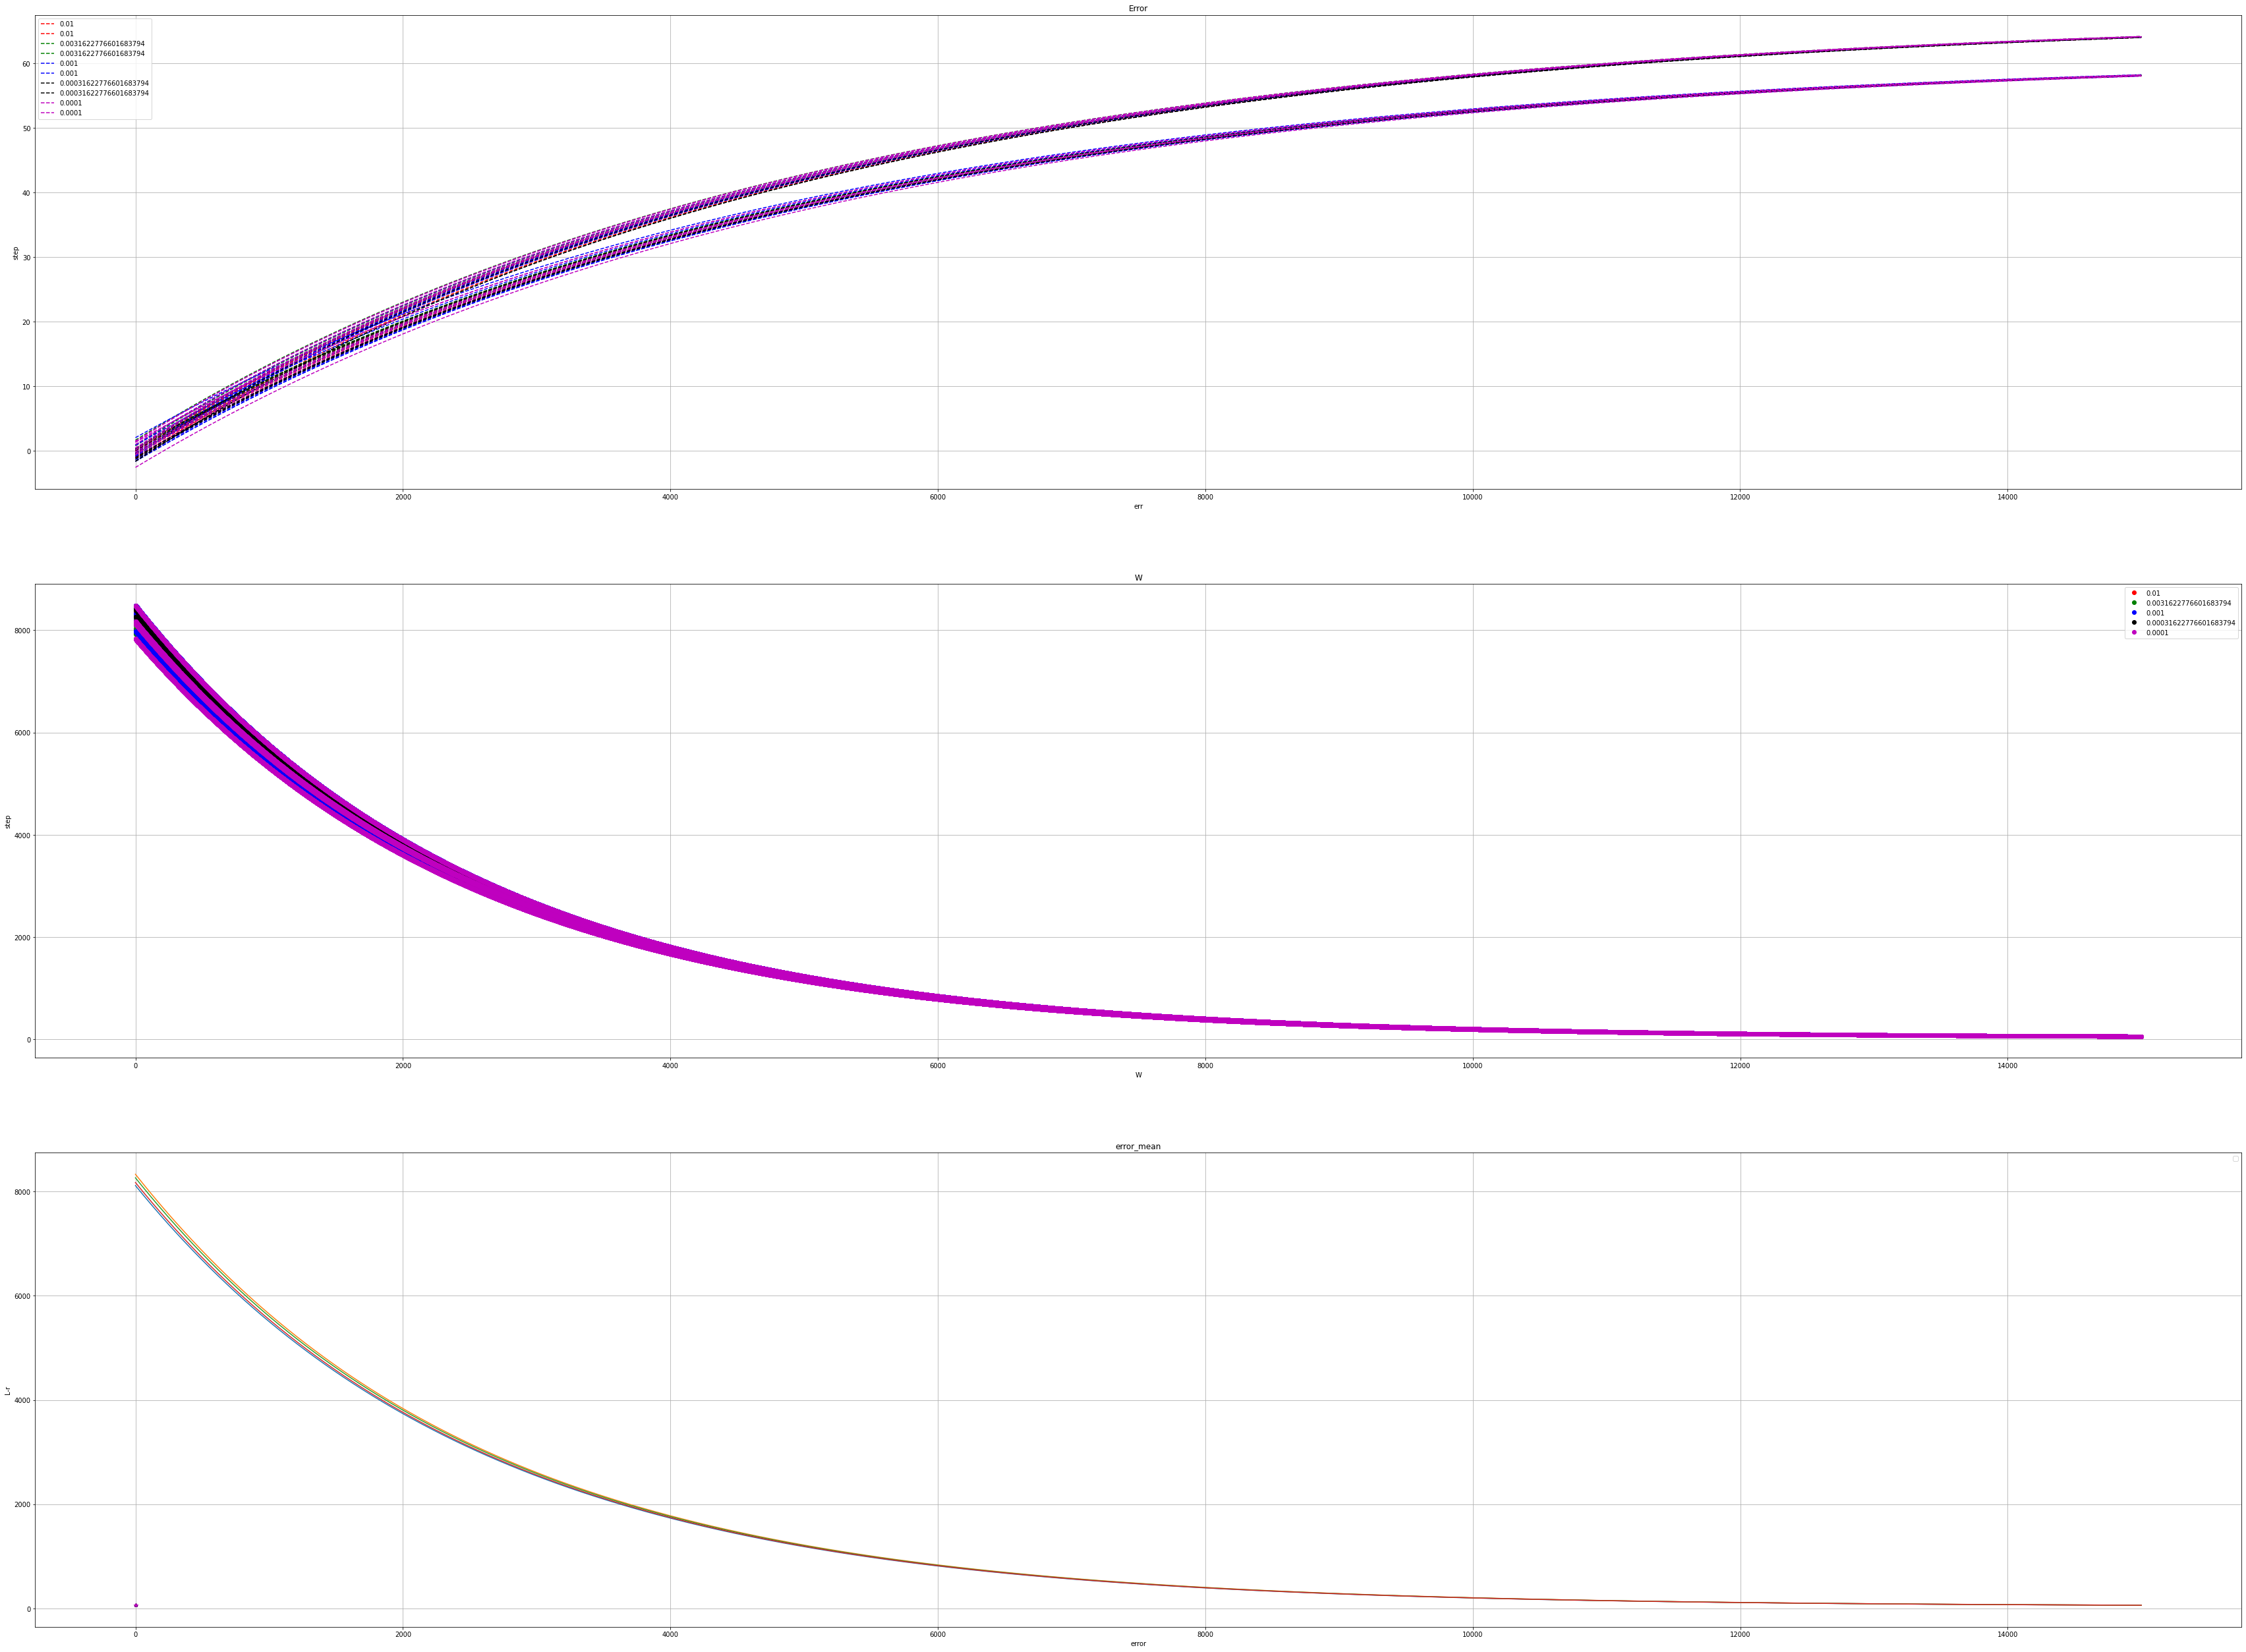

In [339]:
plt.figure(figsize = (60,45))
s = ['r','g','b','k','m']
for m, L_r in zip(s, np.logspace(-2,-4, 5).tolist()):
    
    for i in range(5):

        w = np.random.randn(2)
        errors, w = gradient_descent(data, target, w)
        plt.subplot(3,1,1)
        plt.plot(errors,'--' +m)
        plt.subplot(3,1,2)
        plt.plot(w,'o'+m)
    plt.subplot(3,1,1)
    plt.plot(errors,'--'+m, label = str(L_r))
    plt.subplot(3,1,2)
    plt.plot(w,'o'+m, label = str(L_r))
    plt.subplot(3,1,3)
    plt.plot(L_r, np.mean(errors[-5:]), '*'+m)


plt.subplot(3,1,1)
plt.legend()
plt.grid(True)
plt.title('Error')
plt.xlabel('err')
plt.ylabel('step')
plt.subplot(3,1,2)
plt.legend()
plt.grid(True)
plt.title('W')
plt.xlabel('W')
plt.ylabel('step')
plt.subplot(3,1,3)
plt.legend()
plt.grid(True)
plt.title('error_mean')
plt.xlabel('error')
plt.ylabel('L-r')
plt.show


2.Модифицировать решение первого задания путем добавления  L2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты

In [340]:


def SGD_L2(X, Y, w, L_r = 1.5, max_iter = 1e4, stopping_threshold = 1e-6,alpha=0.1):

    def mserror(X, w, y):
      rd_model = Ridge(alpha=0.1)
      rd_model.fit(X, y)
      y_pred = rd_model.predict(X)
      return (sum((y - y_pred)**2)) / len(y)


    w = np.zeros(2)
    w_list = [w.copy()]
    errors = []
    max_iter = 1e4
    
    stopping_threshold = 1e-6
    weight_diff=np.inf 
    iter_num = 0 
    np.random.seed(42)



    while weight_diff > stopping_threshold  and iter_num < max_iter:
      

      train_ind =np.random.randint(data.shape[0])

      w_new = w - 2  * L_r *  np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0] 
      weight_diff = np.linalg.norm(w_new - w, ord = 2)

      w_list.append(w_new.copy())
      errors.append(mserror(data, w_new, target))
      iter_num += 1
      w = w_new
      
    w_list = np.array(w_list)
    
    plt.plot(range(len(errors)), errors)
    plt.title('MSE')
    plt.xlabel('Iteration number')
  
    print(f'В случае использования стохастического градиентного спуска с добавлением L2 -регуляризации функционал ошибки составляет {round(errors[-1], 4)}')
    return w_list, errors


initial weights: [0. 0.]
Iteration 10: MSE 8158.95, Weight               [0.11949808 0.13224607]
Iteration 20: MSE 8127.31, Weight               [0.23876376 0.26423364]
Iteration 30: MSE 8095.79, Weight               [0.35779749 0.39596323]
Iteration 40: MSE 8064.39, Weight               [0.47659972 0.52743534]
Iteration 50: MSE 8033.12, Weight               [0.5951709  0.65865047]
Iteration 60: MSE 8001.97, Weight               [0.71351148 0.78960913]
Iteration 70: MSE 7970.94, Weight               [0.8316219  0.92031181]
Iteration 80: MSE 7940.03, Weight               [0.94950262 1.05075902]
Iteration 90: MSE 7909.24, Weight               [1.06715409 1.18095125]
Iteration 100: MSE 7878.57, Weight               [1.18457674 1.31088901]
Iteration 110: MSE 7848.02, Weight               [1.30177102 1.44057279]
Iteration 120: MSE 7817.59, Weight               [1.41873739 1.57000309]
Iteration 130: MSE 7787.28, Weight               [1.53547627 1.6991804 ]
Iteration 140: MSE 7757.09, Weight 

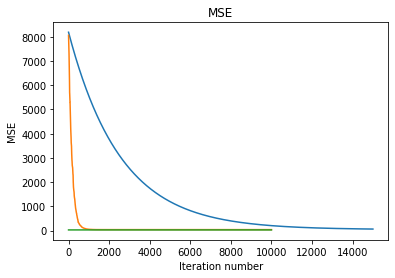

In [341]:
# Визуализирую изменение функционала ошибки
w = np.zeros(2)
w_list =  gradient_descent(data, target, w)
w_list_stoch =  SGD(data, target, w, L_r = 1.5, max_iter = 1e4, stopping_threshold = 1e-6)


  
w_list_stoch_scale =  SGD_L2(data, target, w, L_r = 1.5, max_iter = 1e4, stopping_threshold = 1e-6,alpha=0.1)

